# IMPORTS

First we started with some python imports. For model building we used the <mark>**segmentation_models_pytorch library**</mark>. This has library has a lot segmentation model architechtures. Before you can import the library it needs to be ensured that the library is installed in the conda environment. For this in the anaconda terminal just type the below command to install the library:-

<div class="alert alert-block alert-success">
<b>Conda Command:</b> conda install -q segmentation-models-pytorch
</div>

Once, the libray is installed it can be imported in the script safely. We also imported the utility script Trainer for model training.

In [1]:
import pandas as pd
import numpy as np
import segmentation_models_pytorch as smp
from Utilities.Trainer import Trainer
import torch
import torch.nn as nn
from torchvision import models
import torch.multiprocessing as mp
import matplotlib.pyplot as plt
%matplotlib inline

The below statement helps in better error tracking when training is done in cuda. More details about this can be found in the below url:-

https://pytorch.org/docs/stable/notes/cuda.html

In [2]:
CUDA_LAUNCH_BLOCKING="1"

# Model Building

Next a FPN model with inceptionv3 encoder was created with imagenet weights from the smp library.

In [3]:
torch.manual_seed(42)
ENCODER = 'inceptionv4'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = 6
ACTIVATION = None # could be None for logits or 'softmax2d' for multiclass segmentation

# create segmentation model with pretrained encoder
model = smp.FPN(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    in_channels=3,
    classes=CLASSES, 
    activation=ACTIVATION,
)
print(model)

FPN(
  (encoder): InceptionV4Encoder(
    (features): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (1): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (2): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (3): Mixed_3a(
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=(1, 1), dilation=1, ceil_mode=False)
        (conv): BasicConv2d(
          (conv): Con

# Model Training

Next the model training was started with 30 epochs and initial learning rate as 5e-04. The model checkpoint was saved whenever the validation dice was reported the greater than the previous best validation dice.

In the below results you can see the training starting from epoch 6. This is because the kernel was initally interuptted after epoch 5. So, I had to start all over again. Since, checkpoint was saved upto epoch number 5 so it started from epoch 6.

In [4]:
lr = 5e-04
epochs = 20
path = "./Models/model_fpn_inceptionv4.pth"

In [5]:
model_trainer = Trainer(model, lr, epochs, path)
print(f"Current Device is GPU: {torch.cuda.current_device()}")
print(f"Total memory allocated in GB: {round(torch.cuda.memory_allocated(0)/1024**3,1)}")
print(f"Total memory cached in GB: {round(torch.cuda.memory_reserved(0)/1024**3,1)}")
model_trainer.start()

  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Current Device is GPU: 0
Total memory allocated in GB: 0.5
Total memory cached in GB: 1.0
Learning Rate =  0.0005
Starting epoch: 0 | phase: train | ⏰: 11:14:41


100%|███████████████████████████████████████████████████████████████████| 310/310 [04:03<00:00,  1.27it/s, loss=0.0182]
C:\Users\SIDDHARTA\OneDrive\Documents\NEU-DET\Utilities\Meter.py:40: RuntimeWarning: Mean of empty slice
  dice_neg = np.nanmean(self.dice_neg_scores)
  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.1455 | IoU: 0.3235 | dice: 0.4151 | dice_neg: nan | dice_pos: 0.4151
Starting epoch: 0 | phase: val | ⏰: 11:18:45


100%|███████████████████████████████████████████████████████████████████| 133/133 [01:23<00:00,  1.58it/s, loss=0.0122]


Loss: 0.0972 | IoU: 0.5192 | dice: 0.6472 | dice_neg: nan | dice_pos: 0.6472
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 1 | phase: train | ⏰: 11:20:10


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.1267 | IoU: 0.4099 | dice: 0.5232 | dice_neg: nan | dice_pos: 0.5232
Starting epoch: 1 | phase: val | ⏰: 11:31:28


100%|█████████████████████████████████████████████████████████████████████| 133/133 [01:24<00:00,  1.57it/s, loss=0.01]


Loss: 0.0803 | IoU: 0.5853 | dice: 0.7152 | dice_neg: nan | dice_pos: 0.7152
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 2 | phase: train | ⏰: 11:32:54


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.1077 | IoU: 0.4745 | dice: 0.5949 | dice_neg: nan | dice_pos: 0.5949
Starting epoch: 2 | phase: val | ⏰: 11:44:12


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0744 | IoU: 0.5291 | dice: 0.6454 | dice_neg: nan | dice_pos: 0.6454

Learning Rate =  0.0005
Starting epoch: 3 | phase: train | ⏰: 11:45:35


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0983 | IoU: 0.5043 | dice: 0.6252 | dice_neg: nan | dice_pos: 0.6252
Starting epoch: 3 | phase: val | ⏰: 11:56:52


100%|███████████████████████████████████████████████████████████████████| 133/133 [01:25<00:00,  1.55it/s, loss=0.0085]


Loss: 0.0680 | IoU: 0.6090 | dice: 0.7333 | dice_neg: nan | dice_pos: 0.7333
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 4 | phase: train | ⏰: 11:58:20


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0899 | IoU: 0.5305 | dice: 0.6541 | dice_neg: nan | dice_pos: 0.6541
Starting epoch: 4 | phase: val | ⏰: 12:09:40


100%|██████████████████████████████████████████████████████████████████| 133/133 [01:27<00:00,  1.53it/s, loss=0.00826]


Loss: 0.0661 | IoU: 0.6250 | dice: 0.7465 | dice_neg: nan | dice_pos: 0.7465
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 5 | phase: train | ⏰: 12:11:09


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0810 | IoU: 0.5670 | dice: 0.6911 | dice_neg: nan | dice_pos: 0.6911
Starting epoch: 5 | phase: val | ⏰: 12:22:30


100%|██████████████████████████████████████████████████████████████████| 133/133 [01:27<00:00,  1.53it/s, loss=0.00786]


Loss: 0.0629 | IoU: 0.6540 | dice: 0.7751 | dice_neg: nan | dice_pos: 0.7751
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 6 | phase: train | ⏰: 12:23:59


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0783 | IoU: 0.5759 | dice: 0.7004 | dice_neg: nan | dice_pos: 0.7004
Starting epoch: 6 | phase: val | ⏰: 12:35:23


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0631 | IoU: 0.6117 | dice: 0.7381 | dice_neg: nan | dice_pos: 0.7381

Learning Rate =  0.0005
Starting epoch: 7 | phase: train | ⏰: 12:36:47


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0793 | IoU: 0.5757 | dice: 0.6991 | dice_neg: nan | dice_pos: 0.6991
Starting epoch: 7 | phase: val | ⏰: 12:48:05


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0680 | IoU: 0.6022 | dice: 0.7281 | dice_neg: nan | dice_pos: 0.7281

Learning Rate =  0.0005
Starting epoch: 8 | phase: train | ⏰: 12:49:29


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0763 | IoU: 0.5872 | dice: 0.7120 | dice_neg: nan | dice_pos: 0.7120
Starting epoch: 8 | phase: val | ⏰: 13:00:49


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0592 | IoU: 0.6423 | dice: 0.7643 | dice_neg: nan | dice_pos: 0.7643

Learning Rate =  0.0005
Starting epoch: 9 | phase: train | ⏰: 13:02:13


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0675 | IoU: 0.6207 | dice: 0.7430 | dice_neg: nan | dice_pos: 0.7430
Starting epoch: 9 | phase: val | ⏰: 13:13:34


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0634 | IoU: 0.6315 | dice: 0.7573 | dice_neg: nan | dice_pos: 0.7573
Epoch    10: reducing learning rate of group 0 to 5.0000e-05.

Learning Rate =  5e-05
Starting epoch: 10 | phase: train | ⏰: 13:14:58


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0646 | IoU: 0.6383 | dice: 0.7587 | dice_neg: nan | dice_pos: 0.7587
Starting epoch: 10 | phase: val | ⏰: 13:26:19


100%|██████████████████████████████████████████████████████████████████| 133/133 [01:24<00:00,  1.57it/s, loss=0.00693]


Loss: 0.0554 | IoU: 0.6621 | dice: 0.7822 | dice_neg: nan | dice_pos: 0.7822
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  5e-05
Starting epoch: 11 | phase: train | ⏰: 13:27:45


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0583 | IoU: 0.6489 | dice: 0.7696 | dice_neg: nan | dice_pos: 0.7696
Starting epoch: 11 | phase: val | ⏰: 13:39:06


100%|██████████████████████████████████████████████████████████████████| 133/133 [01:33<00:00,  1.43it/s, loss=0.00686]


Loss: 0.0549 | IoU: 0.6624 | dice: 0.7829 | dice_neg: nan | dice_pos: 0.7829
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  5e-05
Starting epoch: 12 | phase: train | ⏰: 13:40:41


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0581 | IoU: 0.6529 | dice: 0.7720 | dice_neg: nan | dice_pos: 0.7720
Starting epoch: 12 | phase: val | ⏰: 13:51:59


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0549 | IoU: 0.6605 | dice: 0.7808 | dice_neg: nan | dice_pos: 0.7808

Learning Rate =  5e-05
Starting epoch: 13 | phase: train | ⏰: 13:53:07


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0573 | IoU: 0.6557 | dice: 0.7752 | dice_neg: nan | dice_pos: 0.7752
Starting epoch: 13 | phase: val | ⏰: 14:04:25


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0547 | IoU: 0.6600 | dice: 0.7804 | dice_neg: nan | dice_pos: 0.7804

Learning Rate =  5e-05
Starting epoch: 14 | phase: train | ⏰: 14:05:51


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0572 | IoU: 0.6593 | dice: 0.7785 | dice_neg: nan | dice_pos: 0.7785
Starting epoch: 14 | phase: val | ⏰: 14:17:09


100%|██████████████████████████████████████████████████████████████████| 133/133 [01:23<00:00,  1.58it/s, loss=0.00675]


Loss: 0.0540 | IoU: 0.6715 | dice: 0.7897 | dice_neg: nan | dice_pos: 0.7897
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  5e-05
Starting epoch: 15 | phase: train | ⏰: 14:18:35


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0559 | IoU: 0.6623 | dice: 0.7806 | dice_neg: nan | dice_pos: 0.7806
Starting epoch: 15 | phase: val | ⏰: 14:29:53


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0555 | IoU: 0.6656 | dice: 0.7844 | dice_neg: nan | dice_pos: 0.7844

Learning Rate =  5e-05
Starting epoch: 16 | phase: train | ⏰: 14:31:18


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0552 | IoU: 0.6659 | dice: 0.7842 | dice_neg: nan | dice_pos: 0.7842
Starting epoch: 16 | phase: val | ⏰: 14:42:36


100%|██████████████████████████████████████████████████████████████████| 133/133 [01:26<00:00,  1.53it/s, loss=0.00686]


Loss: 0.0549 | IoU: 0.6729 | dice: 0.7904 | dice_neg: nan | dice_pos: 0.7904
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  5e-05
Starting epoch: 17 | phase: train | ⏰: 14:44:07


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0544 | IoU: 0.6689 | dice: 0.7860 | dice_neg: nan | dice_pos: 0.7860
Starting epoch: 17 | phase: val | ⏰: 14:55:27


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0549 | IoU: 0.6747 | dice: 0.7902 | dice_neg: nan | dice_pos: 0.7902

Learning Rate =  5e-05
Starting epoch: 18 | phase: train | ⏰: 14:56:50


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0559 | IoU: 0.6650 | dice: 0.7823 | dice_neg: nan | dice_pos: 0.7823
Starting epoch: 18 | phase: val | ⏰: 15:08:07


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0553 | IoU: 0.6594 | dice: 0.7799 | dice_neg: nan | dice_pos: 0.7799

Learning Rate =  5e-05
Starting epoch: 19 | phase: train | ⏰: 15:09:30


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0548 | IoU: 0.6728 | dice: 0.7898 | dice_neg: nan | dice_pos: 0.7898
Starting epoch: 19 | phase: val | ⏰: 15:20:47


100%|██████████████████████████████████████████████████████████████████| 133/133 [01:24<00:00,  1.58it/s, loss=0.00691]

Loss: 0.0553 | IoU: 0.6633 | dice: 0.7812 | dice_neg: nan | dice_pos: 0.7812



After the model training was done the loss, dice_scores and iou_scores were plotted. 

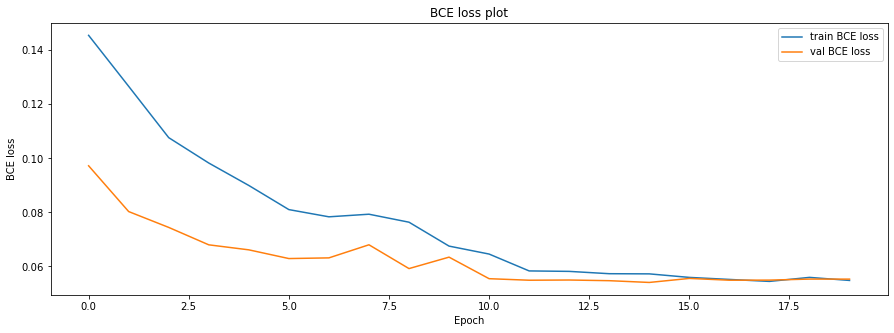

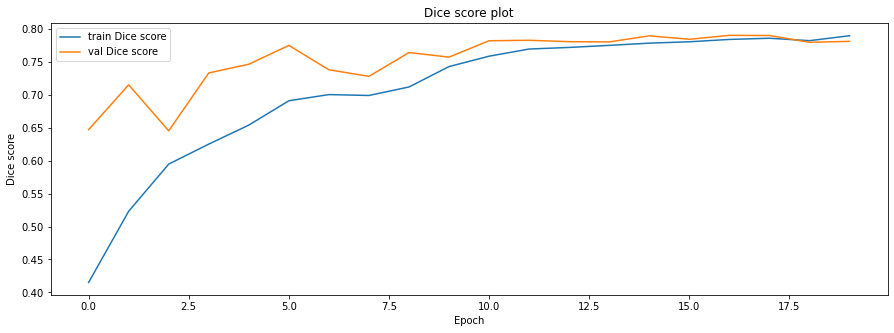

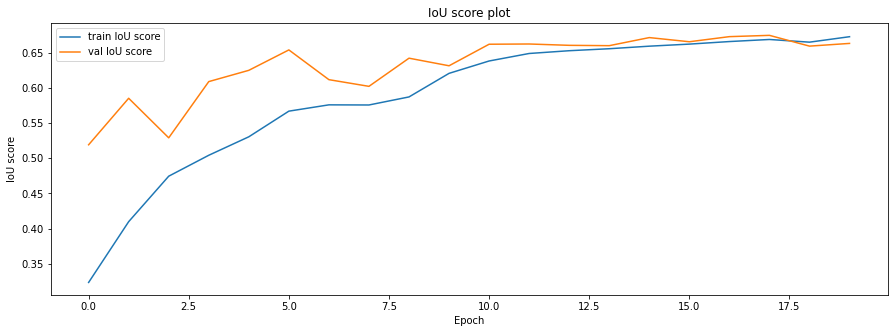

In [6]:
losses = model_trainer.losses
dice_scores = model_trainer.dice_scores # overall dice
iou_scores = model_trainer.iou_scores

def plot(scores, name):
    plt.figure(figsize=(15,5))
    plt.plot(range(len(scores["train"])), scores["train"], label=f'train {name}')
    plt.plot(range(len(scores["train"])), scores["val"], label=f'val {name}')
    plt.title(f'{name} plot'); plt.xlabel('Epoch'); plt.ylabel(f'{name}');
    plt.legend(); 
    plt.show()

plot(losses, "BCE loss")
plot(dice_scores, "Dice score")
plot(iou_scores, "IoU score")

The above results the overall training and validation dice and IoU goes up with epochs and training and validation loss goes down with epochs.

# Convert to ONNX

Lastly the trained model is converted to ONNX format using the Utility script ONNX_Converter.py.

In [7]:
! python ./Utilities/ONNX_converter.py FPN inceptionv4  imagenet  6 ./Models/model_fpn_inceptionv4.pth ./ONNX_models/fpn_inceptionv3.onnx

Model name :FPN
Model checkpoint path is :./Models/model_fpn_inceptionv4.pth
Model output path is :./ONNX_models/fpn_inceptionv3.onnx
Successfully converted the model to onnx format.
